
## Image Classifiers Using Neural Networks and the MNIST and Fashion MNIST Datasets

Useful references and sources:

**MNIST**

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

**Fashion MNIST**

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

- https://en.wikipedia.org/wiki/Fashion_MNIST

- https://keras.io/api/datasets/fashion_mnist/

## PART 1 - *MNIST classifier using MLP*




### Import Needed Resources / Libraries

In [9]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn import metrics
from keras.utils import to_categorical
from keras import layers
import seaborn as sns

from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

### Load and prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

### Examine Data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

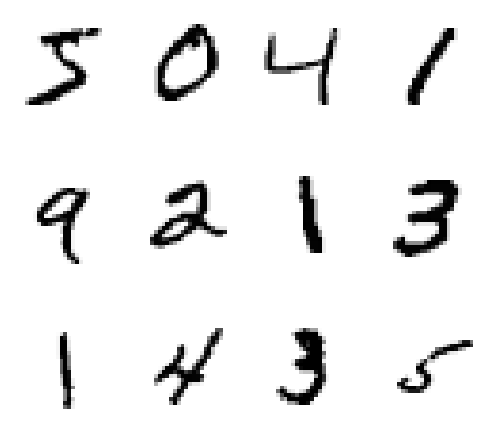

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

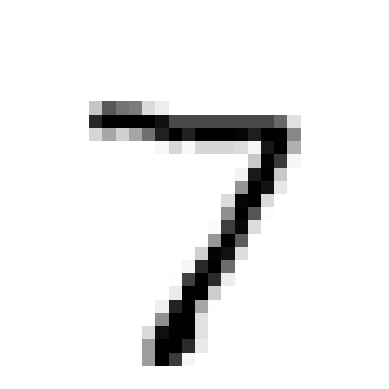

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
X_validation.shape

(10000, 784)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Configure model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

### Train!

In [ ]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 5s 4ms/step - loss: 0.0930 - accuracy: 0.0754 - val_loss: 0.0926 - val_accuracy: 0.0798
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0924 - accuracy: 0.0904 - val_loss: 0.0921 - val_accuracy: 0.0956
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0918 - accuracy: 0.1042 - val_loss: 0.0916 - val_accuracy: 0.1121
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0914 - accuracy: 0.1168 - val_loss: 0.0912 - val_accuracy: 0.1255
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0910 - accuracy: 0.1318 - val_loss: 0.0907 - val_accuracy: 0.1421
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0906 - accuracy: 0.1581 - val_loss: 0.0903 - val_accuracy: 0.1717
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - accuracy: 0.1914 - val_loss: 0.0899 - val_accuracy: 0.2004

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


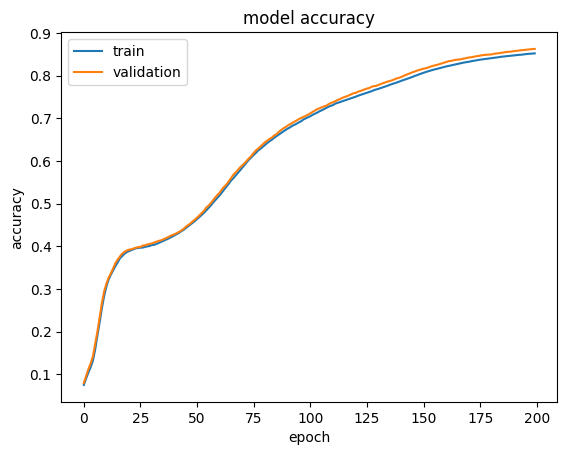

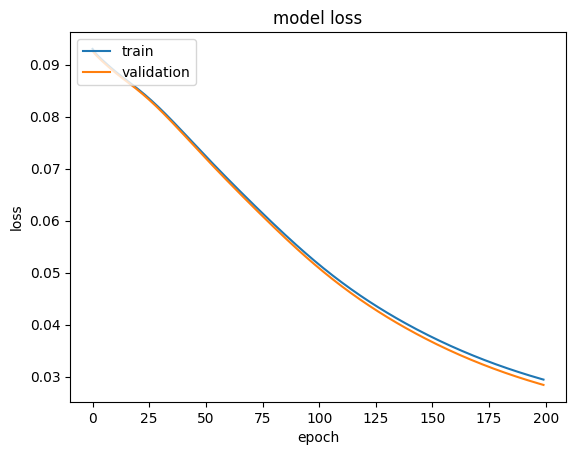

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0284 - accuracy: 0.8624


[0.028411362320184708, 0.8623999953269958]

#### 1.a. Confusion Matrix 

In [ ]:
# Your Confusion Matrix code here and in additional cells as needed
x_test=X_validation / 255.0;
y_pred= model.predict(X_validation)
y_pred=np.argmax(y_pred, axis=1)
cf=metrics.confusion_matrix(y_valid, y_pred);
cf



313/313 [==============================] - 1s 2ms/step


array([[ 945,    0,    3,    3,    1,    7,   14,    1,    6,    0],
       [   0, 1094,    8,    2,    1,    2,    4,    0,   24,    0],
       [  14,   26,  860,   25,   22,    1,   26,   17,   38,    3],
       [   7,    2,   27,  866,    2,   28,   10,   24,   31,   13],
       [   2,    8,    5,    0,  878,    2,   21,    2,    6,   58],
       [  27,   24,   10,   94,   26,  596,   32,   28,   36,   19],
       [  16,    6,   15,    2,   18,   18,  881,    1,    1,    0],
       [   4,   37,   32,    1,   14,    1,    2,  901,    6,   30],
       [  12,   18,   16,   50,   15,   17,   24,   13,  784,   25],
       [  17,   12,   12,   12,   68,   12,    2,   44,   11,  819]])

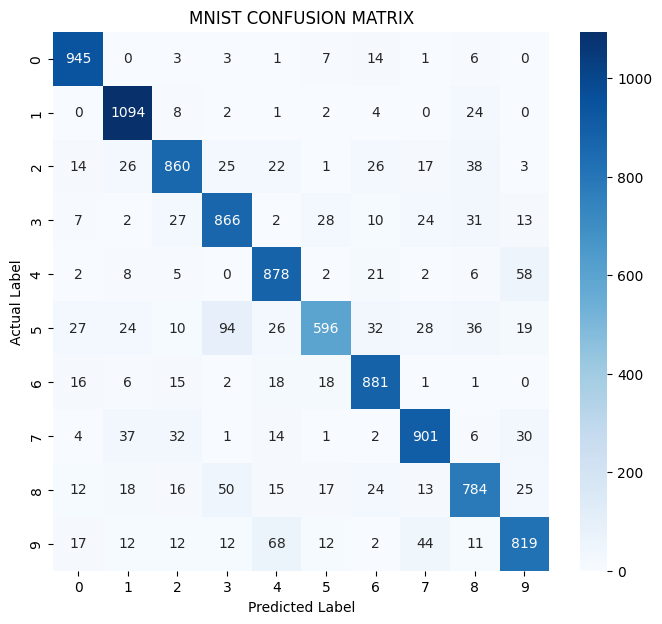

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=True, fmt='d',cmap='Blues',xticklabels=range(10),yticklabels=range(10))
plt.title('MNIST CONFUSION MATRIX')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#### 1.b. Comment on the insights confusion matrix provides *(10 pts)*

1.The diagonal elements represent the samples for each class that were successfully predicted. For instance, the number 945 denotes how many samples from class 0 were properly identified.

2.Classes with higher values along the diagonal typically perform better, whereas larger values in off-diagonal parts suggest class confusion.

3.Off-diagonal elements show samples that were incorrectly categorised. For instance, the number 14 indicates how many samples from class 0 were mistakenly placed in class 6.

4.The class labels, which represent various digits in the MNIST dataset, vary from 0 to 9.




#### 2.Display 10 cases where the classifier makes mistakes. *(20 pts)*

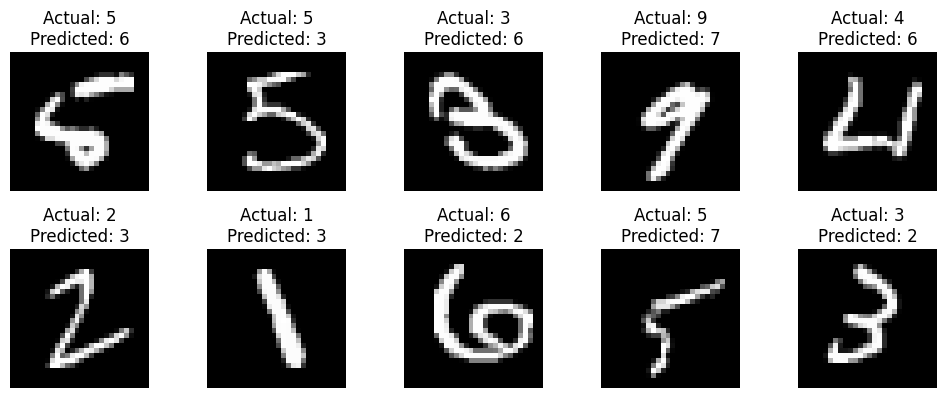

In [ ]:
wrong_indices = np.nonzero(y_pred != y_valid)[0]
plt.figure(figsize=(10, 10))
for i, index in enumerate(wrong_indices[:10]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap="gray")
    plt.title("Actual: %s\nPredicted: %s" % (y_valid[index], y_pred[index]))
    plt.axis('off')
plt.tight_layout()
plt.show()

## *Fashion MNIST*




### Load and prepare the data

In [7]:
# Model / data parameters
num_classes = 10
input_shape = [28 ,28]

In [10]:
# Loading and Spliting Data in Test and Train 
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


### Defining Classes

In [11]:
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot'] 

### Examine Data

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_valid.shape

(10000,)

In [14]:
y_train[0:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

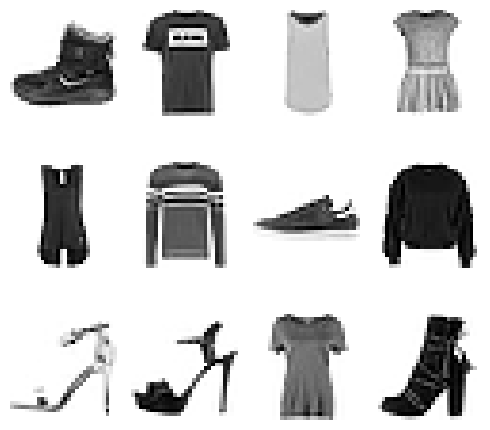

In [15]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
X_valid.shape

(10000, 28, 28)

In [17]:
y_valid.shape

(10000,)

In [18]:
y_valid[0]

9

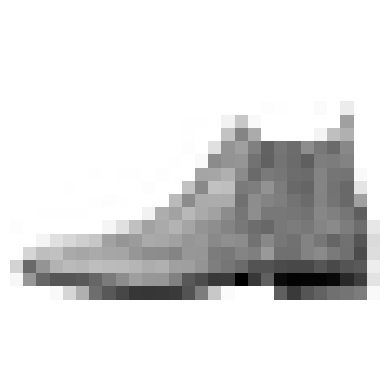

In [19]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [20]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [21]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [22]:
print(y_valid[0])
print(y_validation[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]



Build a NN solution identical to the one before: 
> a. Plot learning curves

> b. Display the confusion matrix for your classifier

> c. Evaluate the model, identify accuracy, etc. 

> d. Discuss why the results are not as good. 





Configure the Model *(10 pts)*

In [23]:
# Your Configure the Model code here and in additional code cells as needed
# use same model and hyperparameters as was used for MNIST above
modelf = Sequential()
modelf.add(Dense(64, activation='sigmoid', input_shape=(784,)))
modelf.add(Dense(10, activation='softmax'))

In [24]:
modelf.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

In [25]:
modelf.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ff61394bf40>>

Train the Model  *(10 pts)*

In [27]:
batch_size=128
epochs=200

history = modelf.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)




Epoch 1/200
469/469 [==============================] - 5s 5ms/step - loss: 0.0909 - accuracy: 0.0899 - val_loss: 0.0903 - val_accuracy: 0.1172
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.1575 - val_loss: 0.0896 - val_accuracy: 0.2038
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.2391 - val_loss: 0.0890 - val_accuracy: 0.2685
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.2884 - val_loss: 0.0885 - val_accuracy: 0.3061
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0882 - accuracy: 0.3151 - val_loss: 0.0879 - val_accuracy: 0.3242
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0877 - accuracy: 0.3318 - val_loss: 0.0874 - val_accuracy: 0.3393
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.3475 - val_loss: 0.0869 - val_accuracy: 0.3525

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


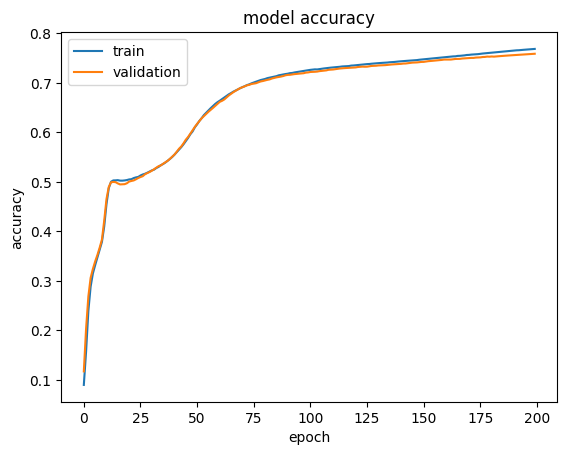

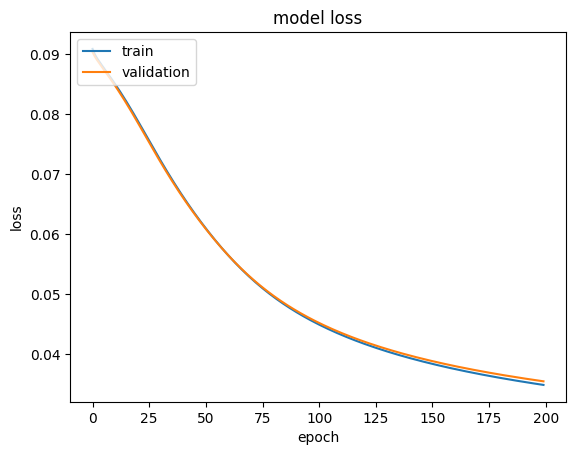

In [28]:
# Your Plot learning curves code here and in additional code cells as needed
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
# Your confusion matrix code here and in additional code cells as needed
x_testf=X_validation / 255.0;
y_predf= modelf.predict(X_validation)
#y_pred=np.argmax(y_pred, axis=1)
y_predf = predicted_classes = np.argmax(y_predf, axis=1)
cf2=metrics.confusion_matrix(y_valid, y_predf);
cf2



313/313 [==============================] - 1s 2ms/step


array([[791,   7,  29, 100,  10,  17,  15,   0,  30,   1],
       [ 10, 918,  14,  43,  13,   0,   0,   0,   2,   0],
       [ 28,   2, 643,  11, 243,  10,  38,   0,  25,   0],
       [ 39,  11,   9, 861,  35,   3,  35,   0,   7,   0],
       [  1,   6, 143,  58, 749,   9,  21,   0,  13,   0],
       [  0,   0,   0,   2,   0, 816,   0, 120,   8,  54],
       [250,   3, 199,  61, 290,  22, 122,   0,  53,   0],
       [  0,   0,   0,   0,   0,  74,   0, 840,   0,  86],
       [  2,   2,  22,  13,   5,  21,   2,   8, 924,   1],
       [  0,   0,   0,   2,   0,  20,   0,  51,   1, 926]])

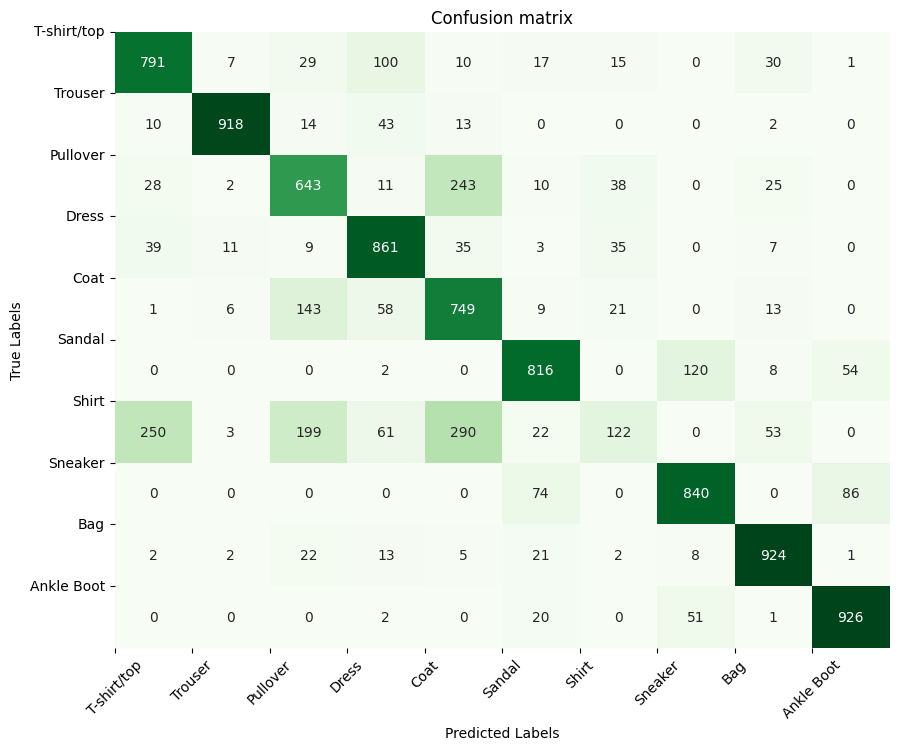

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(cf2,annot=True,fmt='d',cmap='Greens',cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(num_classes),labels=classes_names,rotation=45)
plt.yticks(ticks=np.arange(num_classes),labels=classes_names,rotation=0)
plt.show()

In [31]:
# Your Evaluate the model code here and in additional code cells as needed
modelf.evaluate(X_validation , y_validation)


313/313 [==============================] - 1s 4ms/step - loss: 0.0355 - accuracy: 0.7590


[0.03550335764884949, 0.7590000033378601]

#### Discuss why the results are not as good. 

If you had more time what would you do to improve the results?



1.A model's architecture can be changed by increasing the number of layers, altering the number of neurons in each layer, or experimenting with new layers altogether (by including dropout or batch normalisation layers, for example). Depending on the type of your data, you can also experiment with more sophisticated structures like convolutional neural networks (CNNs) or recurrent neural networks (RNNs).
2. Increase Training Data: If your training dataset is minimal, adding more labelled data will help the model perform more accurately. This can be accomplished by gathering more samples or by creating more training examples using data augmentation techniques.

3. Data preprocessing: Before training, make sure your data has been processed correctly. To improve the model's capacity to identify important patterns in the data, normalise the input features to a similar scale, handle missing values appropriately, and carry out any necessary feature engineering.
4. Increase the number of training epochs to give the model more time to learn from the data. If the model begins to perform well on the training data but not on the validation or test data, be wary of overfitting.

5. Check for Data Inequality: If your dataset exhibits class imbalance, where some classes have noticeably more samples than others, you can try techniques like oversampling the minority class, undersampling the majority class, or using class weights to prioritise underrepresented classes during training.






